# EDA


In [6]:
#Importing Library ต่างๆ
from sklearn import preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
file_path = '/content/drive/MyDrive/data/WineQT.csv'
df = pd.read_csv(file_path, encoding='unicode_escape')

In [9]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
#เช็ค shape กับ ข้อมูล
print("-------------------------------")
print("\n            เช็คข้อมูล\n")
print("-------------------------------")
print("\nShape The DataSet ", df.shape ,"\n" )
df.info()

-------------------------------

            เช็คข้อมูล

-------------------------------

Shape The DataSet  (1143, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes

In [11]:
#เช็ค null
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [12]:
#describe data
df.describe().round(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0
mean,8.3,0.5,0.3,2.5,0.1,15.6,45.9,1.0,3.3,0.7,10.4,5.7,805.0
std,1.7,0.2,0.2,1.4,0.0,10.3,32.8,0.0,0.2,0.2,1.1,0.8,464.0
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,8.4,3.0,0.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,21.0,1.0,3.2,0.6,9.5,5.0,411.0
50%,7.9,0.5,0.2,2.2,0.1,13.0,37.0,1.0,3.3,0.6,10.2,6.0,794.0
75%,9.1,0.6,0.4,2.6,0.1,21.0,61.0,1.0,3.4,0.7,11.1,6.0,1209.5
max,15.9,1.6,1.0,15.5,0.6,68.0,289.0,1.0,4.0,2.0,14.9,8.0,1597.0


In [13]:
#Drop คอลัมม์ ID

df.drop(columns="Id",inplace=True)


#ดูว่า quality มีกี่ตัว  แบ่งตาม quality

print("The Value Quality ",df["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


In [14]:
#เอาข้อมูลมา groupby quality

ave_qu = df.groupby("quality").mean()
ave_qu.round(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.5,0.9,0.2,2.7,0.1,8.2,24.5,1.0,3.4,0.5,9.7
4,7.8,0.7,0.2,2.6,0.1,14.8,40.6,1.0,3.4,0.6,10.3
5,8.2,0.6,0.2,2.5,0.1,16.6,55.3,1.0,3.3,0.6,9.9
6,8.3,0.5,0.3,2.4,0.1,15.2,39.9,1.0,3.3,0.7,10.7
7,8.9,0.4,0.4,2.8,0.1,14.5,37.5,1.0,3.3,0.7,11.5
8,8.8,0.4,0.4,2.6,0.1,11.1,29.4,1.0,3.2,0.8,11.9


<Axes: xlabel='quality'>

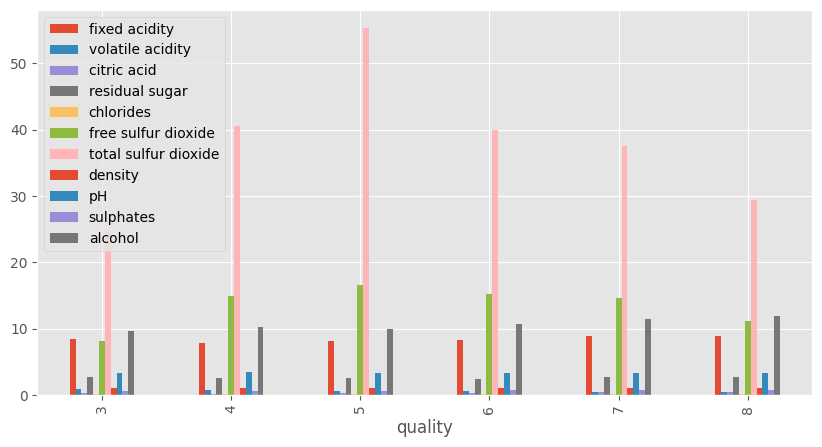

In [15]:
#plot bar จากค่า quality

ave_qu.plot(kind="bar",figsize=(10,5))

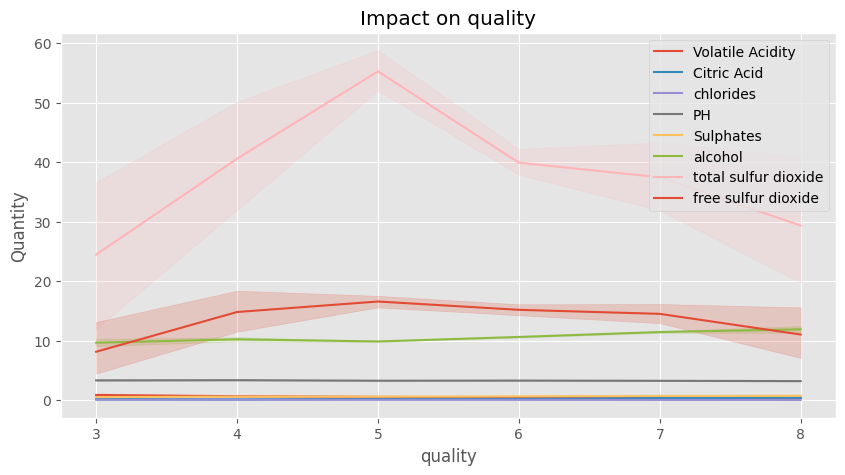

In [16]:
#ดูว่าแต่ละfeature มีผลกับ quality มากแค่ไหน
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=df, x="quality",y="pH",label="PH")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")

sns.lineplot(data=df, x="quality",y="alcohol",label="alcohol")
sns.lineplot(data=df, x="quality",y="total sulfur dioxide",label="total sulfur dioxide")
sns.lineplot(data=df, x="quality",y="free sulfur dioxide",label="free sulfur dioxide")

plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

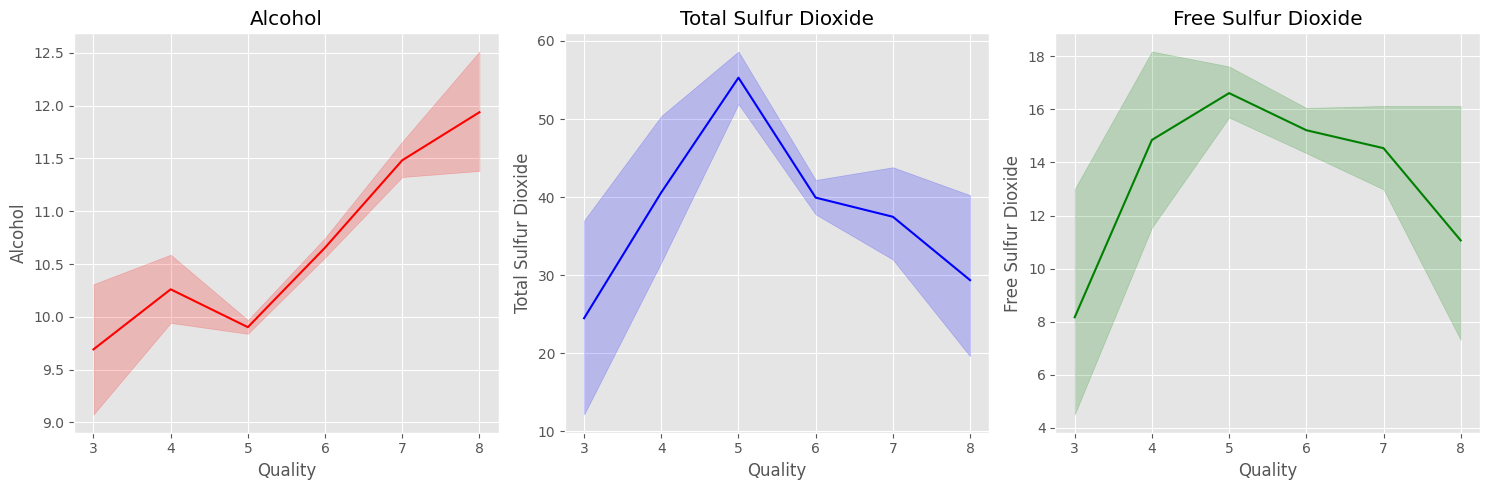

In [17]:
#ได้ 3 feature ที่มีผลต่อ qulity สูง นำมา Plot line graph เปรียบเทียบตาม quality

#ทำ 1*3 grid
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.lineplot(data=df, x="quality", y="alcohol", color="r", ax=axes[0])
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Alcohol')
axes[0].set_title('Alcohol')

sns.lineplot(data=df, x="quality", y="total sulfur dioxide", color="b", ax=axes[1])
axes[1].set_xlabel('Quality')
axes[1].set_ylabel('Total Sulfur Dioxide')
axes[1].set_title('Total Sulfur Dioxide')

sns.lineplot(data=df, x="quality", y="free sulfur dioxide", color="g", ax=axes[2])
axes[2].set_xlabel('Quality')
axes[2].set_ylabel('Free Sulfur Dioxide')
axes[2].set_title('Free Sulfur Dioxide')

plt.tight_layout()
plt.show()

หลังจาก EDA พบว่า ไวน์มี Quality ที่ดีที่สุดคือ 8 และแย่สุดคือ 3
โดยปัจจัยหลักที่ส่งผลต่อไวน์คือ

1.   total sulfur dioxide
2.   free sulfur dioxide
1.   alcohol







# ML

In [18]:
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC ,SVR

In [19]:
#X "ไม่เอา quality" Y เอาเฉพาะ quality
X = df.drop(columns="quality")
y = df["quality"]    # y = quality

In [20]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (857, 11)
X Test  :  (286, 11)
Y Train :  (857,)
Y Test  :  (286,)


 **linear_model**

In [21]:
# using the model LinearRegression
LR_model=LinearRegression()

# fit model
LR_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", LR_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LR_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_LR=LR_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR))

Score the X-train with Y-train is :  0.3766893166865495
Score the X-test  with Y-test  is :  0.3487901433645896
 Model Evaluation Linear R : mean absolute error is  0.4742577332205526
 Model Evaluation Linear R : mean squared  error is  0.37215517566167367
 Model Evaluation Linear R : median absolute error is  0.3771988566534432


In [22]:
# using the model Logistic Regression

Lo_model=LogisticRegression(solver='liblinear')

# fit model

Lo_model.fit(X_train,y_train)


# Score X and Y - test and train model Logistic Regression

print("Score the X-train with Y-train is : ", Lo_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Lo_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_Lo=Lo_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Logistic R : mean absolute error is ", mean_absolute_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : mean squared  error is " , mean_squared_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : median absolute error is " ,median_absolute_error(y_test,y_pred_Lo))

print(" Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_Lo))

Score the X-train with Y-train is :  0.5869311551925321
Score the X-test  with Y-test  is :  0.6258741258741258
 Model Evaluation Logistic R : mean absolute error is  0.4020979020979021
 Model Evaluation Logistic R : mean squared  error is  0.458041958041958
 Model Evaluation Logistic R : median absolute error is  0.0
 Model Evaluation Logistic R : accuracy score  0.6258741258741258


**Decision Tree Classifier**

In [23]:
# using the model Decision Tree Classifier
Tree_model=DecisionTreeClassifier(max_depth=10)
# fit model
Tree_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))

Score the X-train with Y-train is :  0.9253208868144691
Score the X-test  with Y-test  is :  0.5524475524475524


In [24]:
print("The classes ",Tree_model.classes_)

y_pred_T =Tree_model.predict(X_test)

print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))

The classes  [3 4 5 6 7 8]
 Model Evaluation Decision Tree : accuracy score  0.5524475524475524


**Model SVM**

In [25]:
# using the model SVC
svc_model=SVC(C=50,kernel="rbf")

# fit model
svc_model.fit(X_train,y_train)

y_pred_svc =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.5950991831971996
Score the X-test  with Y-test  is :  0.6433566433566433
 Model Evaluation Decision Tree : accuracy score  0.6433566433566433


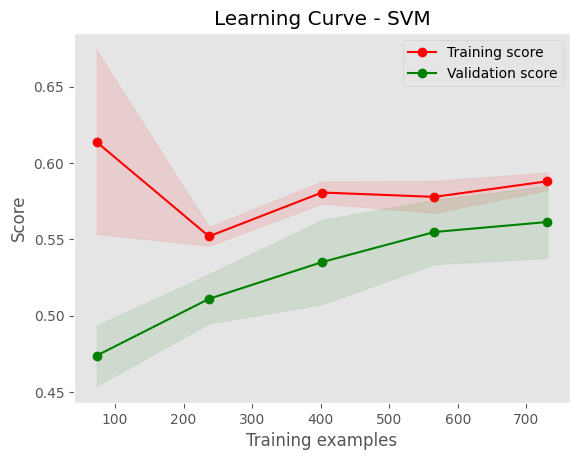

In [36]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves
plot_learning_curve(svc_model, "Learning Curve - SVM", X_train, y_train, cv=5, n_jobs=-1)
plt.show()

In [35]:
# using the model SVR

svr_model=SVR(degree=1,coef0=1, tol=0.001, C=1.5,epsilon=0.001)

# fit model
svr_model.fit(X_train,y_train)

y_pred_svr =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svr_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svr_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svr))

Score the X-train with Y-train is :  0.15604841549607518
Score the X-test  with Y-test  is :  0.24247710281791668
 Model Evaluation Decision Tree : accuracy score  0.6462882096069869


**Neighbors model**

In [34]:
# using the model K Neighbors Classifier

K_model = KNeighborsClassifier(n_neighbors = 5)
K_model.fit(X_train, y_train)

y_pred_k = K_model.predict(X_test)

print("Score the X-train with Y-train is : ", K_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", K_model.score(X_test,y_test))
print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))

Score the X-train with Y-train is :  0.6356673960612691
Score the X-test  with Y-test  is :  0.5152838427947598
 Model Evaluation K Neighbors Classifier : accuracy score  0.5152838427947598


# <b>*ผลลัพธ์จากการ Train data*</b>

&nbsp;&nbsp;**Linear Model**
<br > <br />

1.   LinearRegression

*   X-train with Y-train : 0.3766893166865495 หรือ 37%
*   X-train with Y-train : 0.3766893166865495 หรือ 37%
*   X-test with Y-test : 0.3487901433645896 หรือ 34%
*   Mean absolute error : 0.4742577332205526 หรือ 47%
*   Mean squared error : 0.37215517566167367 หรือ 37%
*   Median absolute error : 0.3771988566534432 หรือ 37%
<br > <br />


2.   LogisticRegression


* X-train with Y-train : 0.5869311551925321 หรือ 58%
* X-test with Y-test : 0.6258741258741258 หรือ 62%
* Mean absolute error : 0.4020979020979021 หรือ 40%
* Mean squared error : 0.458041958041958 หรือ 45%
* Median absolute error : 0.0
* Accuracy : 0.6258741258741258 หรือ 62%
<br > <br />

&nbsp;&nbsp;**Decision Tree Classifier**
<br > <br />
* X-train with Y-train is : 0.9241540256709452 หรือ 92%
* X-test with Y-test is : 0.5384615384615384 หรือ 54%
* Accuracy : 0.5384615384615384 หรือ 54%
<br > <br />

&nbsp;&nbsp;**Model SVM**
<br > <br />
1. SVC
* X-train with Y-train is : 0.5950991831971996 หรือ 59%
* X-test with Y-test is : 0.6433566433566433 หรือ 64%
* Accuracy : 0.6433566433566433 หรือ 64%
<br > <br />

2. SVR

* X-train with Y-train is : 0.14069185408666396 หรือ 14%
* X-test with Y-test is : 0.23501709956140815 หรือ 23%
* Accuracy : 0.6433566433566433 หรือ 64%
<br > <br />


&nbsp;&nbsp;**Neighbors model**
<br > <br />
* X-train with Y-train is : 0.6289381563593932 หรือ 62%
* X-test with Y-test is : 0.5314685314685315 หรือ 53%
* Accuracy : 0.5314685314685315 หรือ 53%



# ปรับปรุง SVC
**เลือก Model ที่ดีที่สุดมาปรับปรุงให้ดีขึ้น**

**SVC** <br/>
X-train with Y-train is : 0.5950991831971996 หรือ 0.59%<br/>
X-test with Y-test is : 0.6433566433566433 หรือ 0.64%<br/>
Accuracy : 0.6433566433566433 หรือ 0.64%


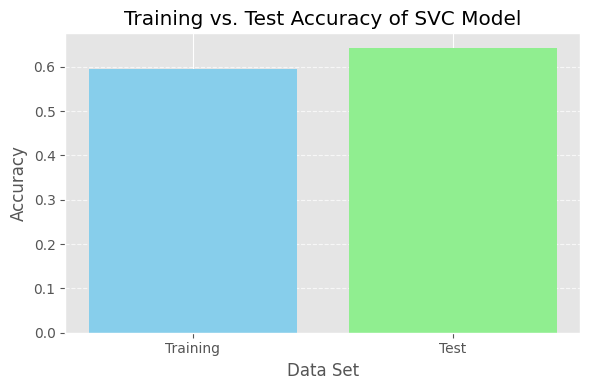

In [26]:
training_accuracy = 0.5951
test_accuracy = 0.6433

x_labels = ["Training", "Test"]
y_values = [training_accuracy, test_accuracy]

plt.figure(figsize=(6, 4))
plt.bar(x_labels, y_values, color=['skyblue', 'lightgreen'])
plt.xlabel("Data Set")
plt.ylabel("Accuracy")
plt.title("Training vs. Test Accuracy of SVC Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
# using the model SVC
svc_model=SVC(C=45,kernel="rbf")

# fit model
svc_model.fit(X_train,y_train)

y_pred_svc =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.5962800875273523
Score the X-test  with Y-test  is :  0.6462882096069869
 Model Evaluation Decision Tree : accuracy score  0.6462882096069869


เราพยายามนำ model SVC มาหา accuracy ที่ดีที่สุด โดยปรับ parameter

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 10, 50, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_svc_model = grid_search.best_estimator_

y_pred_best = best_svc_model.predict(X_test)
print("Best Model Parameters:", best_params)
print("Best Model Test Accuracy:", best_svc_model.score(X_test, y_test))

Best Model Parameters: {'C': 1, 'kernel': 'linear'}
Best Model Test Accuracy: 0.611353711790393


In [27]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

# using the model SVC
svc_model=SVC(C=45,kernel="rbf")

# fit model
svc_model.fit(X_train,y_train)

y_pred_svc =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

X Train :  (914, 11)
X Test  :  (229, 11)
Y Train :  (914,)
Y Test  :  (229,)
Score the X-train with Y-train is :  0.5962800875273523
Score the X-test  with Y-test  is :  0.6462882096069869
 Model Evaluation Decision Tree : accuracy score  0.6462882096069869


ซึ่งค่าที่ดีที่สุดคือ 0.64 ซึ่งเราต้องการปรับปรุงให้ดีกว่านี้

# ลองใช้ Model ใหม่ เลือก RandomForest มาปรับปรุง

เราลองใช้ Model
* Bagging
* Random Forest
* AdaBoost

In [28]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# BaggingClassifier
bagging_model = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
print("Bagging Classifier - Accuracy:", accuracy_score(y_test, y_pred_bagging))

# RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier - Accuracy:", accuracy_score(y_test, y_pred_rf))


# AdaBoostClassifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)
print("AdaBoost Classifier - Accuracy:", accuracy_score(y_test, y_pred_adaboost))


Bagging Classifier - Accuracy: 0.6899563318777293
Random Forest Classifier - Accuracy: 0.7030567685589519
AdaBoost Classifier - Accuracy: 0.4672489082969432


* Bagging Classifier - Accuracy: 0.6899563318777293
* Random Forest Classifier - Accuracy: 0.7030567685589519
* AdaBoost Classifier - Accuracy: 0.4672489082969432

**เราเห็นว่า Random Forest ให้ค่า accuracy ที่ดีที่สุดจึงนำมาปรับจูน**

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

# using the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Score the X-train with Y-train is: ", rf_model.score(X_train, y_train))
print("Score the X-test with Y-test is: ", rf_model.score(X_test, y_test))
print("Model Evaluation RandomForest: accuracy score", accuracy_score(y_test, y_pred_rf))


X Train :  (914, 11)
X Test  :  (229, 11)
Y Train :  (914,)
Y Test  :  (229,)
Score the X-train with Y-train is:  1.0
Score the X-test with Y-test is:  0.7030567685589519
Model Evaluation RandomForest: accuracy score 0.7030567685589519


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

# Use the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Score on the X-train with Y-train is:", rf_model.score(X_train, y_train))
print("Score on the X-test with Y-test is:", rf_model.score(X_test, y_test))
print("Model Evaluation Random Forest: accuracy score", accuracy_score(y_test, y_pred_rf))

X Train :  (914, 11)
X Test  :  (229, 11)
Y Train :  (914,)
Y Test  :  (229,)
Score on the X-train with Y-train is: 0.9529540481400438
Score on the X-test with Y-test is: 0.7117903930131004
Model Evaluation Random Forest: accuracy score 0.7117903930131004


หลังจากทำการปรับปรุงเราได้โมเดดล Randomforest ที่ให้ค่า accuracy สูงสุดอยู่ที่ 71%

# สรุปผล

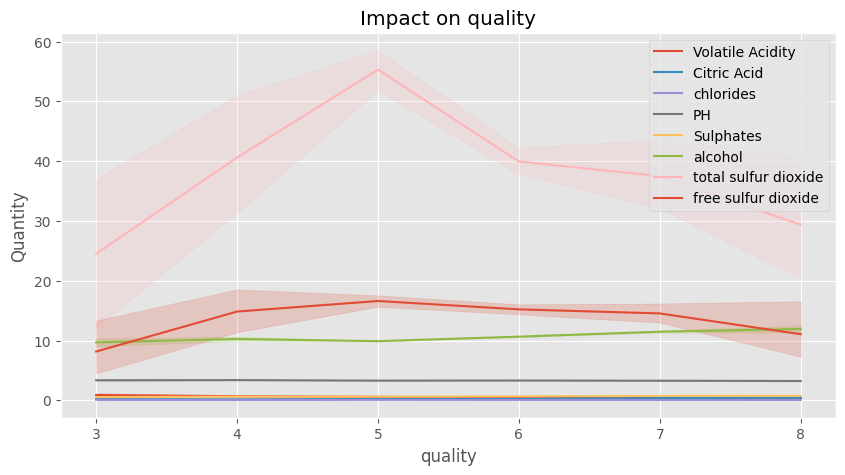

In [31]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=df, x="quality",y="pH",label="PH")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")

sns.lineplot(data=df, x="quality",y="alcohol",label="alcohol")
sns.lineplot(data=df, x="quality",y="total sulfur dioxide",label="total sulfur dioxide")
sns.lineplot(data=df, x="quality",y="free sulfur dioxide",label="free sulfur dioxide")

plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

**จากการนำข้อมูลมาทำการวิเคราะห์**<br/>
เราได้เห็นfeatureต่างๆ และค่า Quality
โดยแบ่ง Quality หรือประสิทธิภาพของไวน์ได้เป็นช่วง 3-8
จากนั้นนำ feature มาทำ eda และหาว่า feature ไหนบ้างส่งผลกับ Quality ของไวน์มากที่สุด <br/>
**ค่าที่มีผลต่อ Quality มากที่สุด (นอกจากนั้นจะมีผลน้อย)**
1.   total sulfur dioxide
2.   free sulfur dioxide
3.   alcohol

หลังจากทำการวิเคราะห์ข้อมูลจึงนำข้อมูลมา train ด้วย Model ต่างๆได้เห็นว่า SVC ดีที่สุด **แต่** เราอยากทำให้ดีมากกว่านี้เลยลอง train model อื่นเพิ่มและได้ใช้ randomforest จากนั้นนำมาปรับปรุงและแก้ไข parameter และได้ผลลัพธ์ที่ดีที่สุด



In [32]:
print("Model Evaluation RandomForest: accuracy score", accuracy_score(y_test, y_pred_rf))

Model Evaluation RandomForest: accuracy score 0.7117903930131004
